### FNN

Numpy [x,y] x: rows, y: columns

in a 2D NumPy array, the structure is such that the outer list represents rows, and the inner lists represent columns within each row.

For example, consider the array np.array([[1, 1, 1], [2, 2, 2]]):

The outer list contains two inner lists, corresponding to the two rows of the array.
Each inner list has three elements, representing the three columns in each row.
Therefore:

The number of rows in the array is determined by the number of inner lists, which is 2 in this case.
The number of columns is determined by the number of elements in each inner list, which is 3.
Thus, the shape of this array is (2, 3), indicating 2 rows and 3 columns. This structure is consistent with standard matrix notation in mathematics, where a matrix is described by its rows and columns.

NN: a tuple with a list with weights and bias.

L: list of integers [a,b,c]

-the first elements should be equal to the number of features of x.

-the last elements must be number of output in the network.

**weights**: (in units, out units) each layer \\
**bias**: (1, out units) \\
if L = [3,5,1] \\
weights: (3,5) (5,1)\\
bias: (1,5) (1,5)

In [2]:
# x[:, :] # extract entire array
# x[:, 0] # extract all rows but only the first column.
# x[:, n] # extract all rows for the n'th column.
# x[0, :] # extract the first row and all columns.
# x[1, :] # extract the second row and all columns
# x[:, 1] # extract all rows and the second column.
# x[::2, :] # extract every other row.
# x[:, ::2] # extract every other column.
# x[1:3, 2:4] # extract a subarray from the second to the third row and the third to the fourth column

## Numpy einsum

**Transpose:** We can write the transpose of matrix $A$:

```
np.einsum('ij -> ji', A)
```

**Trace:** We can write the trace of matrix $A$:

```
np.einsum('ii -> ', A)
```

**Diagonal:** We can write the diagonal of matrix $A$:

```
np.einsum('ii -> i', A)
```

**Matrix product:** We can write the multiplication of matrices $A$ and $B$ as:

```
np.einsum('ij, jk -> ik', A, B)
```

Note that $j$ in both matrices $A$ and $B$ should be the same size.

**Batched matrix product (or why bothering):** All of the functions we performed above are built in numpy (np.tranpose, np.trace, np.matmul), however, when you want to do more complex operations, it might become less readable and computationaly efficient. Let's introduce a three dimensional matrix $H$ with indices $b,j,k$, where the first dimension is the batch (training example) dimension. In einsum, we can then write:

```
np.einsum('ij, bjk -> bik', A, H)
```


# Supervised vs Unsupervised Learning


In [3]:
# load library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets,manifold

# load data
data = datasets.fetch_openml('mnist_784',version=1,return_X_y=True)
pixel_values,targets = data
targets = targets.astype(int)



/Users/billhikari/anaconda3/lib/python3.11/site-packages/sklearn/datasets/_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


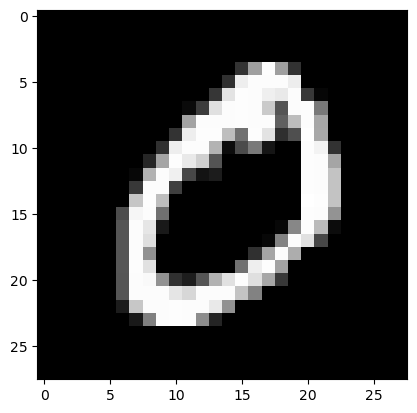

In [4]:
# reshape the samples in original shape
single_image = pixel_values.iloc[1, :].values.reshape(28, 28)
plt.imshow(single_image, cmap='gray')

/var/folders/ff/tm9v3zh91jv9vg9vgbf1rhnr0000gn/T/ipykernel_46379/3196932948.py:10: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  tsne_df.loc[:, "targets"] = tsne_df["targets"].astype(int)


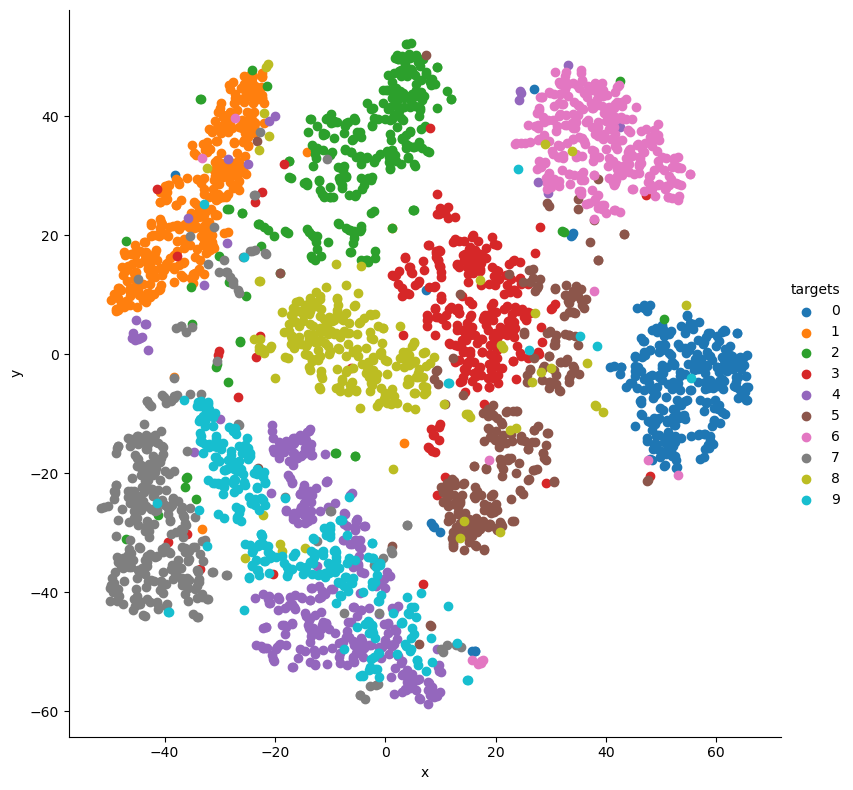

In [5]:
pixel_values_array = pixel_values.to_numpy()
tsne = manifold.TSNE(n_components=2, random_state=42)
transformed_data = tsne.fit_transform(pixel_values_array[:3000,:])

tsne_df = pd.DataFrame(
    np.column_stack((transformed_data, targets[:3000])),
    columns=["x", "y", "targets"]
)

tsne_df.loc[:, "targets"] = tsne_df["targets"].astype(int)

grid = sns.FacetGrid(tsne_df, hue="targets", height=8)
grid.map(plt.scatter, "x", "y").add_legend()

# Cross Validation

In [7]:
data = pd.read_csv('winequality-red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
# shuffling the dataframe
df = data.sample(frac = 1).reset_index(drop = True)

# top 1000 rows are selected
# for training
df_train = df.head(1000)

# bottom 599 values are selected
# for testing and validation
df_test = df.tail(599)

In [9]:
# The decision tree model
from sklearn import tree
from sklearn import metrics

# initialization decision tree classifier class with a max_depth of 3
#clf = tree.DecisionTreeClassifier(max_depth=3)
# try with depth of 7
clf = tree.DecisionTreeClassifier(max_depth=7)
# choose the columns we want to train on
cols = [
    'fixed acidity',
    'volatile acidity',
    'citric acid',
    'residual sugar',
    'chlorides',
    'free sulfur dioxide',
    'total sulfur dioxide',
    'density',
    'pH',
    'sulphates',
]

# train the model with provided features
clf.fit(df_train[cols], df_train['quality'])

# prediction on the training set
training_predictions = clf.predict(df_train[cols])

# prediction on the test set
test_predictions = clf.predict(df_test[cols])

# accuracy of predictions on training dataset
training_accuracy = metrics.accuracy_score(df_train['quality'],training_predictions)

# accuracy of predictions on testing dataset
test_accuracy = metrics.accuracy_score(df_test['quality'],test_predictions)

print('Training Accuracy:', training_accuracy)
print('Test Accuracy:', test_accuracy)

Training Accuracy: 0.749
Test Accuracy: 0.5525876460767947


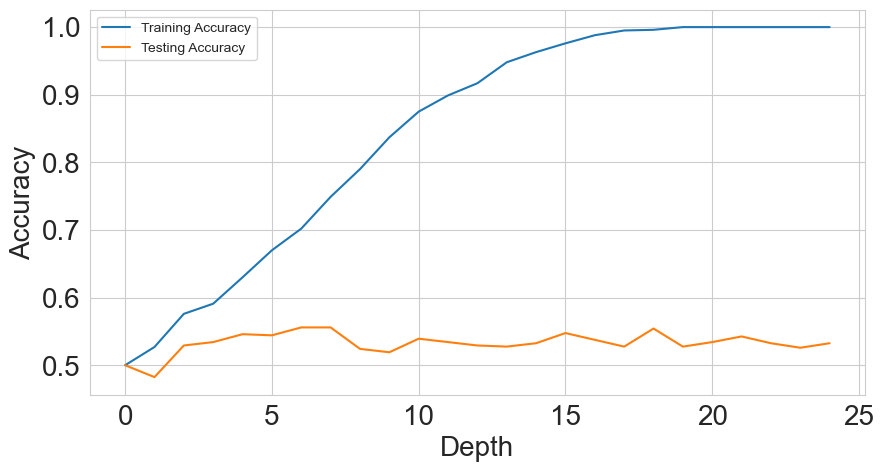

In [10]:
import matplotlib
import matplotlib.pyplot as plt
# this is our global size of label text # on the plots
matplotlib.rc('xtick',labelsize = 20)
matplotlib.rc('ytick',labelsize = 20)

# this ensures that the plot is displayed inside the notebook
%matplotlib inline

# initialize lists to store accuracies for training and testing data
training_accuracy = [0.5]
testing_accuracy = [0.5]

cols = [
    'fixed acidity',
    'volatile acidity',
    'citric acid',
    'residual sugar',
    'chlorides',
    'free sulfur dioxide',
    'total sulfur dioxide',
    'density',
    'pH',
    'sulphates',
]

# iterate some depts
for depth in range(1,25):
  clf = tree.DecisionTreeClassifier(max_depth=depth)

  # fit the model
  clf.fit(df_train[cols], df_train['quality'])

  # training and testing predictions
  training_predictions = clf.predict(df_train[cols])
  test_predictions = clf.predict(df_test[cols])

  # accuracy of predictions on training
  training_accuracy.append(metrics.accuracy_score(df_train['quality'],training_predictions))

  # accuracy of predictions on testing
  testing_accuracy.append(metrics.accuracy_score(df_test['quality'],test_predictions))

# creating two plots
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(testing_accuracy, label='Testing Accuracy')
plt.legend(loc = 'upper left')
plt.xlabel('Depth',size = 20)
plt.ylabel('Accuracy',size = 20)
plt.show()


In [11]:
# K-fold cross validation
from sklearn import model_selection

if __name__ == '__main__':
  # training data is in a csv file called 'train.csv'
  df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/winequality-red.csv')

  # create a new column called kfold and fill with -1
  df['kfold'] = -1

  # randomize the rows of data
  df = df.sample(frac=1).reset_index(drop=True)

  # initialize the kfold class from model_selection
  kf = model_selection.KFold(n_splits=5)

  # fill the new kfold column
  for f, (t_, v_) in enumerate(kf.split(X=df)): # enumerate function adds a counter to an iterable and return it as an enumerate object.
    df.loc[v_, 'kfold'] = f # df.loc[row_indexer,column_indexer]

  # save the new csv file
  #df.to_csv('train_folds.csv', index=False)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Colab Notebooks/winequality-red.csv'

In [12]:
# stratifed k-fold cross validation
import pandas as pd
from sklearn import model_selection

if __name__ == '__main__':
  # training data is in a csv file called 'train.csv'
  df = pd.read_csv('train.csv')

  # create a new column called kfold and fill with -1
  df['kfold'] = -1

  # randomize the rows of data
  df = df.sample(frac=1).reset_idex(drop=True)

  # fetch targets
  y = df.target.values

  # initiate the kfold class from model_selection module
  kf = model_selection.StratifiedKFold(n_splits=5) # compared with normal k-fold

  # fill the new kfold column
  for f, (t_, v_) in enumerate(kf.split(X=df, y=y)):
    df.loc[v_, 'kfold'] = f

  # save the new csv with kfold column
  df.to_csv('train_folds.csv', index=False)

FileNotFoundError: [Errno 2] No such file or directory: 'train.csv'

Text(0, 0.5, 'count')

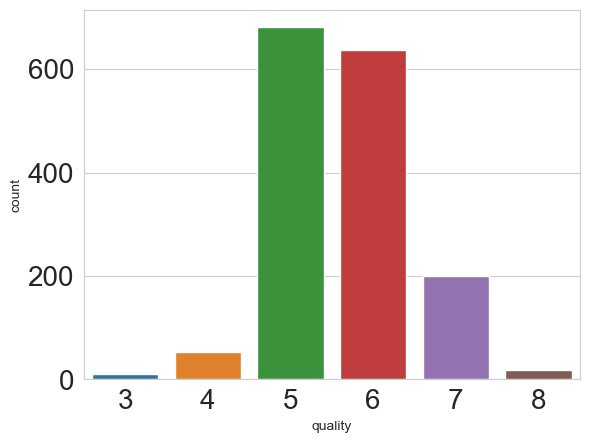

In [13]:
b = sns.countplot(x = 'quality',data = data)
b.set_xlabel('quality')
b.set_ylabel('count')

In [14]:
# stratified k-fold for regression
# Usually simple k-fold cross validation works for any regression problem.
# To use straified k-fold for a regression problem we have to divide the target into bins

import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn import model_selection

def create_folds(data):
  # create a new column called kfold and fill it with -1
  data['kfold'] = -1

  # randomize the rows of data
  data = data.sample(frac=1).reset_index(drop = True)

  # calculate the number of bins by Sturge's rule
  num_bins = int(np.floor(1  + np.log2(len(data))))

  # bin targets
  data.loc[:, 'bins'] = pd.cut(
      data['target'], bins = num_bins, labels = False
  )

  # initialize the kfold class from model_selection module
  kf = model_selection.StratifiedKFold(n_splits=5)

  # fill the new kfold column
  for f, (t_,v_) in enumerate(kf.split(X = data, y = data.bins.values)):
    data.loc[v_,'kfold'] = f

  # drop the bins column
  data = data.drop('bins', axis = 1)

  # return dataframe with folds
  return data

if __name__ == '__main__':
  # we create a sample dataset with 15000 samples
  X, y = datasets.make_regression(
      n_samples = 15000, n_features=100, n_targets= 1)

  # create a dataframe out of our numpy arrays
  df = pd.DataFrame(
      X,
      columns = [f'f_{i}' for i in range(X.shape[1])]
  )
  df.loc[:, 'target'] = y

  # create folds
  df = create_folds(df)

/Users/billhikari/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


# Evaluation metrics

In [15]:
# python code for calculating accuracy
def accurary(y_true, y_pred):
  '''
  A very simple function for calculating accuracy
  '''
  correct = 0

  # loop over all elements of y_true and y_pred
  for yt, yp in zip(y_true, y_pred):
    if yt == yp:
      correct += 1

  # return accuracy
  return correct / len(y_true)

In [16]:
def true_positive(y_true, y_pred):
  """
  Function to calculate True Positives :param y_true: list of true values :
  param y_pred: list of predicted values :return: number of true positives
  """
# initialize
  tp = 0
  for yt, yp in zip(y_true, y_pred):
    if yt == 1 and yp == 1: tp += 1
  return tp

def true_negative(y_true, y_pred):
  """
  Function to calculate True Negatives :param y_true: list of true values :
  param y_pred: list of predicted values :return: number of true negatives
  """
# initialize
  tn = 0
  for yt, yp in zip(y_true, y_pred):
    if yt == 0 and yp == 0: tn += 1
  return tn

def false_positive(y_true, y_pred):
  """
  Function to calculate False Positives :param y_true: list of true values :
  param y_pred: list of predicted values :return: number of false positives
  """
# initialize
  fp = 0
  for yt, yp in zip(y_true, y_pred):
    if yt == 0 and yp == 1: fp += 1
    return fp
def false_negative(y_true, y_pred):
  """
  Function to calculate False Negatives :param y_true: list of true values :
  param y_pred: list of predicted values :return: number of false negatives
  """
# initialize
  fn = 0
  for yt, yp in zip(y_true, y_pred):
    if yt == 1 and yp == 0: fn += 1
  return fn


In [17]:
def accuracy_v2(y_true, y_pred):
  tp = true_positive(y_true, y_pred)
  fp = false_positive(y_true, y_pred)
  fn = false_negative(y_true, y_pred)
  tn = true_negative(y_true, y_pred)
  accuracy_score = (tp + tn) / (tp + tn + fp + fn)
  return accuracy_score

In [18]:
def precision(y_true, y_pred):
  """
Function to calculate precision
:param y_true: list of true values :param y_pred: list of predicted values :return: precision score
  """
  tp = true_positive(y_true, y_pred)
  fp = false_positive(y_true, y_pred)
  if tp + fp == 0:
    return 0
  precision = tp / (tp + fp)
  return precision

l1 = [0,1,1,1,0,0,0,1]
l2 = [0,1,0,1,0,1,0,0]
precision(l1, l2)

1.0

In [19]:
def recall(y_true, y_pred):
  tp = true_positive(y_true, y_pred)
  fn = false_negative(y_true, y_pred)
  recall_score = tp / (tp + fn)
  return recall_score

recall(l1, l2)

0.5

In [20]:
y_true = [0,0,0,1,0,0,0,0,0,0,
          1,0,0,0,0,0,0,0,1,0]

y_pred = [0.02638412, 0.0490937, 0.15952202, 0.079377, 0.27259048, 0.03543574,0.61977213,
0.11114267, 0.0191491, 0.03819563, 0.08584789, 0.03447096, 0.18521942, 0.33056815,
0.31620708, 0.17554844, 0.11639273, 0.39095342, 0.04644807, 0.05934905]

precisions = []
recalls = []

thresholds = [0.0490937 , 0.05934905, 0.079377,0.08584789, 0.11114267,  0.11639273,0.15952202, 0.17554844, 0.18521942, 0.27259048, 0.31620708, 0.39095342, 0.61977213,
 0.33056815]

# for every threshold, calculate predictions in binary and append calculated
# precisions and recalls to their respective lists
for i in thresholds:
  temp_predictions = [1 if x>= i else 0 for x in y_pred]
  p = precision(y_true, temp_predictions)
  r = recall(y_true, temp_predictions)
  precisions.append(p)
  recalls.append(r)

In [21]:
print(recalls)
print(precisions)

[0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.3333333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[1.0, 1.0, 1.0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


Text(0.5, 1.0, 'Precision-Recall Curve')

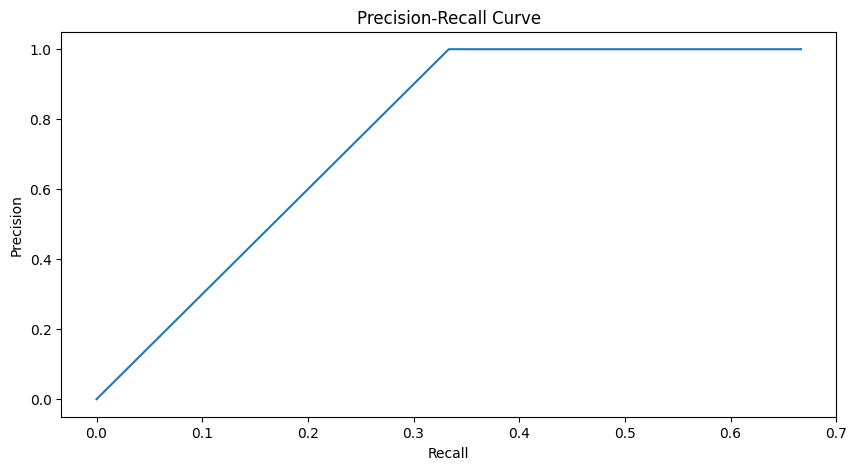

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(recalls, precisions)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')